In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chiluverusushma","key":"6ca0632035ecba498140262fbc039094"}'}

In [6]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [7]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip -qq dogs-vs-cats.zip

In [10]:

!unzip -qq train.zip

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Summary of the Model**

In [13]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**To prevent the model from overfitting, we apply regularization techniques during the data preprocessing stage. In this process, each image is transformed into a tensor.**

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Callbacks can be employed to stop training prematurely if the model shows no improvement, or to save the model's weights after each epoch. They can also be used to adjust the learning rate, log metrics, and visualize the model's performance.

In [16]:
from tensorflow import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.x",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 14s 137ms/step - loss: 0.7003 - accuracy: 0.5110 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 4s 55ms/step - loss: 0.6939 - accuracy: 0.5225 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 5s 80ms/step - loss: 0.6940 - accuracy: 0.5430 - val_loss: 0.6796 - val_accuracy: 0.6220
Epoch 4/10
63/63 [==============================] - 5s 69ms/step - loss: 0.6750 - accuracy: 0.5935 - val_loss: 0.6348 - val_accuracy: 0.6390
Epoch 5/10
63/63 [==============================] - 5s 71ms/step - loss: 0.6396 - accuracy: 0.6425 - val_loss: 0.6304 - val_accuracy: 0.6490
Epoch 6/10
63/63 [==============================] - 6s 96ms/step - loss: 0.6099 - accuracy: 0.6820 - val_loss: 0.6922 - val_accuracy: 0.5870
Epoch 7/10
63/63 [==============================] - 4s 55ms/step - loss: 0.5825 - accuracy: 0.6965 - val_loss: 0.6521 - val_accuracy: 0.6290
Epoch 8/10


Here Number of epochs increases, accuracy increases which is directly proportional.

Accuracy=77.45% Val_acc=68.6% test accuracy=68.6%

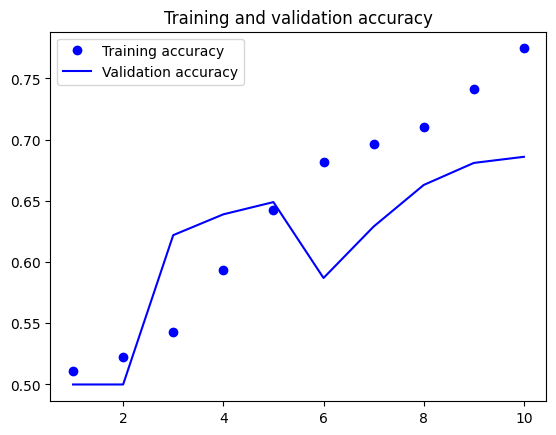

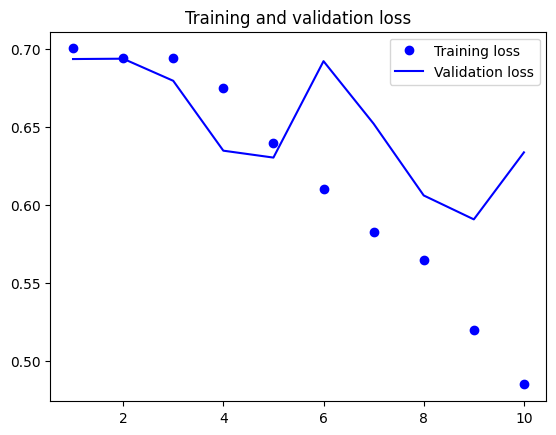

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The training accuracy and training loss indicate that the model is learning and
improving on the training data.
The validation accuracy and validation loss show general improvement but with some fluctuations, indicating potential issues with overfitting or variability in performance on the validation set.

The upward trend in validation accuracy and the downward trend in validation loss suggest that the model is likely improving but might need further tuning to stabilize and generalize better on unseen data. This could include techniques like data augmentation, regularization, or more epochs to achieve more consistent validation performance.



In [18]:
test_model = keras.models.load_model("convnet_from_scratch1.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.6181 - accuracy: 0.6970
Test accuracy: 0.697


Validated Test accuracy without data augmentation=69.7%

**Data Augmentation**

Data augmentation in convolutional neural networks (CNNs) is a technique to increase the amount and diversity of training data by applying various transformations to the original images. This approach helps improve the generalization ability of CNN models, making them more robust to variations in input data and reducing overfitting


In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 11s 139ms/step - loss: 0.7012 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 5s 83ms/step - loss: 0.6933 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5270
Epoch 3/10
63/63 [==============================] - 7s 105ms/step - loss: 0.6932 - accuracy: 0.5345 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 6s 85ms/step - loss: 0.6881 - accuracy: 0.5530 - val_loss: 0.6821 - val_accuracy: 0.5360
Epoch 5/10
63/63 [==============================] - 9s 132ms/step - loss: 0.6697 - accuracy: 0.6085 - val_loss: 0.6757 - val_accuracy: 0.5390
Epoch 6/10
63/63 [==============================] - 4s 56ms/step - loss: 0.6570 - accuracy: 0.6320 - val_loss: 0.7014 - val_accuracy: 0.5160
Epoch 7/10
63/63 [==============================] - 6s 90ms/step - loss: 0.6414 - accuracy: 0.6305 - val_loss: 0.6373 - val_accuracy: 0.6550
Epoch 8/1

In [22]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.6149 - accuracy: 0.6890
Test accuracy: 0.689


Accuracy=69.75% val_Acc=70.2% test_acc=68.9%

2) **Validating by increase in training sample size from 1000 to 1500**

In [23]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 12s 110ms/step - loss: 0.6946 - accuracy: 0.5440 - val_loss: 0.7276 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 6s 60ms/step - loss: 0.6866 - accuracy: 0.5653 - val_loss: 0.6521 - val_accuracy: 0.6130
Epoch 3/10
94/94 [==============================] - 8s 85ms/step - loss: 0.6441 - accuracy: 0.6350 - val_loss: 0.6857 - val_accuracy: 0.5910
Epoch 4/10
94/94 [==============================] - 6s 63ms/step - loss: 0.6126 - accuracy: 0.6633 - val_loss: 0.5924 - val_accuracy: 0.6830
Epoch 5/10
94/94 [==============================] - 5s 53ms/step - loss: 0.5688 - accuracy: 0.7067 - val_loss: 0.5969 - val_accuracy: 0.7040
Epoch 6/10
94/94 [==============================] - 9s 95ms/step - loss: 0.5229 - accuracy: 0.7433 - val_loss: 0.5906 - val_accuracy: 0.7050
Epoch 7/10
94/94 [==============================] - 6s 60ms/step - loss: 0.4798 - accuracy: 0.7723 - val_loss: 0.5689 - val_accuracy: 0.7060
Epoch 8/10


In [27]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 50ms/step - loss: 0.5266 - accuracy: 0.7540
Test accuracy: 0.754


Accuracy=85.27% val_acc=75.10% test_acc=75.4%

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [29]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 72ms/step - loss: 0.6948 - accuracy: 0.5133 - val_loss: 0.6926 - val_accuracy: 0.5110
Epoch 2/10
94/94 [==============================] - 10s 101ms/step - loss: 0.6934 - accuracy: 0.5117 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/10
94/94 [==============================] - 5s 52ms/step - loss: 0.6979 - accuracy: 0.5187 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/10
94/94 [==============================] - 10s 100ms/step - loss: 0.6908 - accuracy: 0.5220 - val_loss: 0.6857 - val_accuracy: 0.5330
Epoch 5/10
94/94 [==============================] - 5s 51ms/step - loss: 0.6912 - accuracy: 0.5227 - val_loss: 0.6934 - val_accuracy: 0.4950
Epoch 6/10
94/94 [==============================] - 5s 53ms/step - loss: 0.6942 - accuracy: 0.5250 - val_loss: 0.6952 - val_accuracy: 0.5010
Epoch 7/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6793 - accuracy: 0.5710 - val_loss: 0.6595 - val_accuracy: 0.6590
Epoch 8/

In [31]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.6191 - accuracy: 0.6740
Test accuracy: 0.674


Accuracy=64.30% val_acc=61.2% test_acc=67.4%

**3. Finding the ideal training sample size**

Setting training set size to 1500, validation set size to 1000, and test set size to 500 and validating.

In [32]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [34]:

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [35]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 12s 112ms/step - loss: 0.6987 - accuracy: 0.5110 - val_loss: 0.6888 - val_accuracy: 0.5460
Epoch 2/10
94/94 [==============================] - 10s 106ms/step - loss: 0.6854 - accuracy: 0.5723 - val_loss: 0.6845 - val_accuracy: 0.5605
Epoch 3/10
94/94 [==============================] - 7s 71ms/step - loss: 0.6491 - accuracy: 0.6367 - val_loss: 0.6162 - val_accuracy: 0.6745
Epoch 4/10
94/94 [==============================] - 10s 106ms/step - loss: 0.6010 - accuracy: 0.6857 - val_loss: 0.6271 - val_accuracy: 0.6345
Epoch 5/10
94/94 [==============================] - 7s 71ms/step - loss: 0.5800 - accuracy: 0.7083 - val_loss: 0.5403 - val_accuracy: 0.7385
Epoch 6/10
94/94 [==============================] - 9s 89ms/step - loss: 0.5194 - accuracy: 0.7437 - val_loss: 0.5821 - val_accuracy: 0.7330
Epoch 7/10
94/94 [==============================] - 6s 61ms/step - loss: 0.4818 - accuracy: 0.7707 - val_loss: 0.5731 - val_accuracy: 0.7065
Epoch 8

In [36]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.6442 - accuracy: 0.6430
Test accuracy: 0.643


Accuracy = 85.47%, Val_accuracy = 75.25% and Test accuracy = 64.3

In [37]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [38]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [39]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [40]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 14s 129ms/step - loss: 0.6958 - accuracy: 0.5063 - val_loss: 0.6918 - val_accuracy: 0.5515
Epoch 2/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6891 - accuracy: 0.5527 - val_loss: 0.6585 - val_accuracy: 0.6565
Epoch 3/10
94/94 [==============================] - 7s 74ms/step - loss: 0.6404 - accuracy: 0.6383 - val_loss: 0.6131 - val_accuracy: 0.6595
Epoch 4/10
94/94 [==============================] - 8s 88ms/step - loss: 0.6051 - accuracy: 0.6770 - val_loss: 0.5842 - val_accuracy: 0.6870
Epoch 5/10
94/94 [==============================] - 8s 84ms/step - loss: 0.5635 - accuracy: 0.7020 - val_loss: 0.5536 - val_accuracy: 0.7285
Epoch 6/10
94/94 [==============================] - 6s 61ms/step - loss: 0.5177 - accuracy: 0.7447 - val_loss: 0.5690 - val_accuracy: 0.7135
Epoch 7/10
94/94 [==============================] - 6s 60ms/step - loss: 0.4747 - accuracy: 0.7787 - val_loss: 0.5910 - val_accuracy: 0.6945
Epoch 8/10


In [41]:
test_model = keras.models.load_model(
    "convnet_from_scratch3.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.5516 - accuracy: 0.7330
Test accuracy: 0.733


Accuracy=85.13%, val_Acc=74.35%, test_Acc=73.3%

**Data Augmentation:**

In [42]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [43]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [44]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 11s 98ms/step - loss: 0.6949 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 10s 97ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
94/94 [==============================] - 12s 122ms/step - loss: 0.6940 - accuracy: 0.4937 - val_loss: 0.6928 - val_accuracy: 0.5055
Epoch 4/10
94/94 [==============================] - 8s 80ms/step - loss: 0.6939 - accuracy: 0.4967 - val_loss: 0.6901 - val_accuracy: 0.4985
Epoch 5/10
94/94 [==============================] - 11s 117ms/step - loss: 0.6898 - accuracy: 0.4987 - val_loss: 0.6895 - val_accuracy: 0.5280
Epoch 6/10
94/94 [==============================] - 8s 81ms/step - loss: 0.6868 - accuracy: 0.5407 - val_loss: 0.6892 - val_accuracy: 0.5090
Epoch 7/10
94/94 [==============================] - 10s 98ms/step - loss: 0.6906 - accuracy: 0.5200 - val_loss: 0.6895 - val_accuracy: 0.5655
Epoch 

In [45]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.6756 - accuracy: 0.5880
Test accuracy: 0.588


Accuracy=59.07% val_acc=53.95% test_acc = 58.8%

**4.Executing using a pre-trained network**

VGG16 is the architecture of this pre-trained network.

This is the architecture loading a pre-trained VGG16 model (without the top fully connected layers) with weights trained on the ImageNet dataset. The convolutional base is a series of convolutional and pooling layers that can be used for feature extraction.

Feature extraction - Instantiating the VGG16 convolutional base

In [46]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [47]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 2s 2s/step


(3000, 5, 5, 512)

**Feature Extraction:** pre-trained convolutional base can be used to extract high-level features from images. These features can then be used as input to a custom classifier.


In [48]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.x",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 2s 14ms/step - loss: 16.7062 - accuracy: 0.9263 - val_loss: 5.6387 - val_accuracy: 0.9675
Epoch 2/15
94/94 [==============================] - 1s 10ms/step - loss: 3.3008 - accuracy: 0.9787 - val_loss: 4.4663 - val_accuracy: 0.9740
Epoch 3/15
94/94 [==============================] - 0s 5ms/step - loss: 2.3661 - accuracy: 0.9857 - val_loss: 4.7717 - val_accuracy: 0.9750
Epoch 4/15
94/94 [==============================] - 0s 5ms/step - loss: 0.8478 - accuracy: 0.9923 - val_loss: 5.8854 - val_accuracy: 0.9735
Epoch 5/15
94/94 [==============================] - 1s 5ms/step - loss: 0.7103 - accuracy: 0.9913 - val_loss: 5.2503 - val_accuracy: 0.9740
Epoch 6/15
94/94 [==============================] - 0s 5ms/step - loss: 0.9262 - accuracy: 0.9923 - val_loss: 7.2989 - val_accuracy: 0.9705
Epoch 7/15
94/94 [==============================] - 1s 7ms/step - loss: 0.2781 - accuracy: 0.9977 - val_loss: 6.5724 - val_accuracy: 0.9710
Epoch 8/15
94/94 

accuracy=99.93% val_acc=97.30%

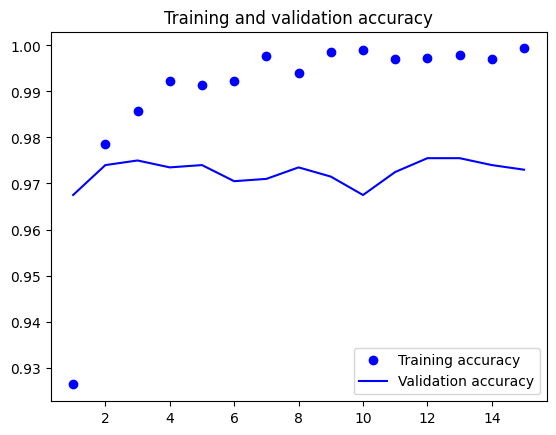

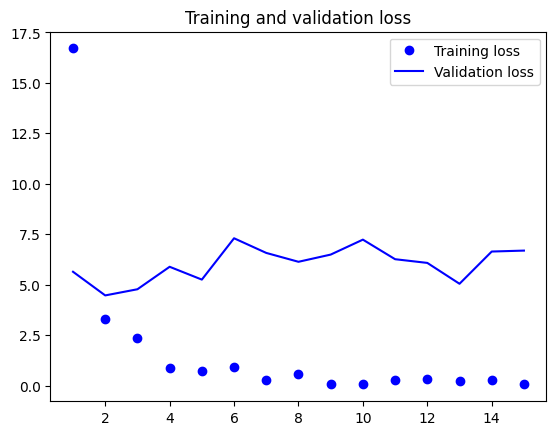

In [49]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Training and Validation accuracy graph indicates that while the model performs exceptionally well on the training data, its performance on the validation data suggests overfitting.

Traning and Validation Loss: The graph indicates underfitting or slightly overfitting based on the gap between the training and validation loss

In [50]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


**Feature extraction with Data Augmentation**

In [51]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [52]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.x",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
94/94 [==============================] - 23s 216ms/step - loss: 18.7694 - accuracy: 0.9020 - val_loss: 4.0094 - val_accuracy: 0.9730
Epoch 2/5
94/94 [==============================] - 20s 206ms/step - loss: 6.5756 - accuracy: 0.9467 - val_loss: 3.2288 - val_accuracy: 0.9750
Epoch 3/5
94/94 [==============================] - 19s 203ms/step - loss: 4.7100 - accuracy: 0.9587 - val_loss: 2.7504 - val_accuracy: 0.9775
Epoch 4/5
94/94 [==============================] - 17s 175ms/step - loss: 5.4149 - accuracy: 0.9590 - val_loss: 3.0542 - val_accuracy: 0.9775
Epoch 5/5
94/94 [==============================] - 17s 175ms/step - loss: 3.6969 - accuracy: 0.9660 - val_loss: 4.4878 - val_accuracy: 0.9685


Accuracy = 96.6%, Val_accuracy = 96.85%

In [53]:

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 98ms/step - loss: 4.4646 - accuracy: 0.9650
Test accuracy: 0.965


Accuracy=96.5% val_Acc=96.85% test_acc=96.5%